# WMT figs of $S_\Omega(\theta)$ and $\frac{d}{dt}M_\Omega(\theta)$

In [1]:
import xarray as xr
import json
import gcsfs
import numpy as np
import cmocean
import cartopy.crs as ccrs #cartopy coord ref sys
import cartopy
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt
import dask
import dask.array as dsa
from xgcm import Grid
import xgcm 
from xgcm.autogenerate import generate_grid_ds
from xhistogram.xarray import histogram
from matplotlib.colors import LogNorm

In [2]:
with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

era5_ds = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ERA5/datasets/hist_ds.zarr'))
era5_nodeltaT = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ERA5/datasets/hist_ds_nodeltaT.zarr'))
era5_ds_regridded_sst = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ERA5/datasets/hist_ds_glorys_sst_regridded.zarr'))
gopaf_ds = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/GOPAF/datasets/dVdt.zarr'))

In [3]:
era5 = era5_ds.sel(theta_bin=31.8, method='nearest').drop(['omega_e', 'omega_ro'])
era5_nodT = era5_nodeltaT.sel(theta_bin=31.8, method='nearest').drop(['omega_e', 'omega_ro'])
era5_regrid = era5_ds_regridded_sst.sel(theta_bin=31.8, method='nearest').drop(['omega_e', 'omega_ro'])

/tmp/ipykernel_2445/2278461910.py:1: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  era5 = era5_ds.sel(theta_bin=31.8, method='nearest').drop(['omega_e', 'omega_ro'])
/tmp/ipykernel_2445/2278461910.py:2: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  era5_nodT = era5_nodeltaT.sel(theta_bin=31.8, method='nearest').drop(['omega_e', 'omega_ro'])
/tmp/ipykernel_2445/2278461910.py:3: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  era5_regrid = era5_ds_regridded_sst.sel(theta_bin=31.8, method='nearest').drop(['omega_e', 'omega_ro'])


In [5]:
era5_resampled = era5.sel(time=slice('2023-01-02', '2023-10-31')).resample(time='D').mean()
era5_resampled_regrid = era5_regrid.sel(time=slice('2023-01-02', '2023-10-31')).resample(time='D').mean()
era5_resampled

<xarray.Dataset>
Dimensions:     (time: 303)
Coordinates:
    theta_bin   float64 31.75
  * time        (time) datetime64[ns] 2023-01-02 2023-01-03 ... 2023-10-31
Data variables:
    omega_slhf  (time) float64 dask.array<chunksize=(303,), meta=np.ndarray>
    omega_sshf  (time) float64 dask.array<chunksize=(303,), meta=np.ndarray>
    omega_ssr   (time) float64 dask.array<chunksize=(303,), meta=np.ndarray>
    omega_str   (time) float64 dask.array<chunksize=(303,), meta=np.ndarray>

In [6]:
dVdt = gopaf_ds.histogram_theta
tot_V = xr.open_dataarray('tot_V.nc', chunks={})

In [7]:
tot_V

<xarray.DataArray (time: 304)>
dask.array<open_dataset-__xarray_dataarray_variable__, shape=(304,), dtype=float32, chunksize=(304,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2023-01-01T12:00:00 ... 2023-10-31T12:00:00

In [12]:
summed = era5_resampled.to_array().sum('variable').load()
summed_nodT = era5_nodT.sel(time=slice('2023-01-02', '2023-10-31')).to_array().sum('variable').load()
summed_regrid = era5_resampled_regrid.to_array().sum('variable').load()

In [9]:
summed

<xarray.DataArray (time: 303)>
array([      0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
...
         -5309.39002561,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,    5132.09135241,
             0.        ,   -1967.28491742,       0.        ,
             0.        ,   12933.96844818,       0.        ,
         12450.47350868,   26046.75807261,   20760.91011937,
          7870.70016615,    8803.73999669,       0.        ,
             0.        ,   -7644.93728989,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ])
Coordinates:
    theta_bin  float64 31.75
  * time       (time) datetime64[ns] 2023-01-02 2023-01-03 ... 2023-10-31

In [11]:
dVdt.time

<xarray.DataArray 'time' (time: 303)>
array(['2023-01-02T12:00:00.000000000', '2023-01-03T12:00:00.000000000',
       '2023-01-04T12:00:00.000000000', ..., '2023-10-29T12:00:00.000000000',
       '2023-10-30T12:00:00.000000000', '2023-10-31T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2023-01-02T12:00:00 ... 2023-10-31T12:00:00
Attributes:
    _ChunkSizes:          1024
    _CoordinateAxisType:  Time
    axis:                 T
    long_name:            Time (hours since 1950-01-01)
    standard_name:        time
    valid_max:            640668.0
    valid_min:            639924.0

In [9]:
era5_resampled.time

<xarray.DataArray 'time' (time: 303)>
array(['2023-01-02T00:00:00.000000000', '2023-01-03T00:00:00.000000000',
       '2023-01-04T00:00:00.000000000', ..., '2023-10-29T00:00:00.000000000',
       '2023-10-30T00:00:00.000000000', '2023-10-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    theta_bin  float64 31.75
  * time       (time) datetime64[ns] 2023-01-02 2023-01-03 ... 2023-10-31

In [14]:
dVdt_reassign_time = dVdt.assign_coords({'time':era5_resampled.time})
tot_V_reassign_time = tot_V.isel(time=slice(1,None)).assign_coords({'time':era5_resampled.time})

In [15]:
tot_V_reassign_time

<xarray.DataArray (time: 303)>
dask.array<getitem, shape=(303,), dtype=float32, chunksize=(303,), chunktype=numpy.ndarray>
Coordinates:
    theta_bin  float64 31.75
  * time       (time) datetime64[ns] 2023-01-02 2023-01-03 ... 2023-10-31

In [16]:
dVdt_reassign_time

<xarray.DataArray 'histogram_theta' (time: 303)>
dask.array<open_dataset-histogram_theta, shape=(303,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    theta_bin  float64 31.75
  * time       (time) datetime64[ns] 2023-01-02 2023-01-03 ... 2023-10-31

In [17]:
summed.time[272]

<xarray.DataArray 'time' ()>
array('2023-10-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    theta_bin  float64 31.75
    time       datetime64[ns] 2023-10-01

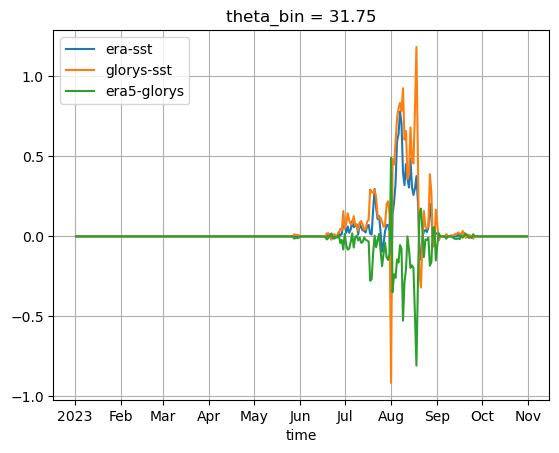

In [24]:
(summed/1e6).plot(label='era-sst')
(summed_regrid/1e6).plot(label='glorys-sst')
((summed-summed_regrid)/1e6).plot(label='era5-glorys')
plt.legend()
plt.grid();

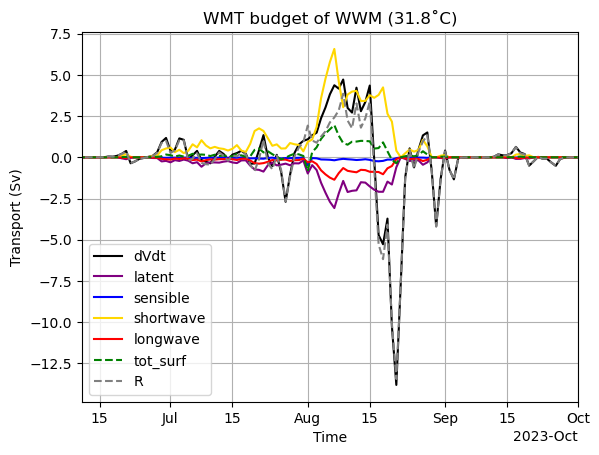

In [20]:
(dVdt_reassign_time/1e6).plot(label='dVdt', color='k')
(era5_nodT.omega_slhf/1e6).plot(label='latent', color='purple')
(era5_nodT.omega_sshf/1e6).plot(label='sensible', color='blue')
(era5_nodT.omega_ssr/1e6).plot(label='shortwave', color='gold')
(era5_nodT.omega_str/1e6).plot(label='longwave', color='r')
(era5_nodT/1e6).to_array().sum('variable').plot(label='tot_surf', color='green', linestyle='dashed')
((dVdt_reassign_time - summed_nodT)/1e6).plot(label='R', color='grey', linestyle='dashed')

plt.grid()
plt.legend()
plt.xlim(summed_nodT.time[160], summed_nodT.time[272])
plt.title('WMT budget of WWM (31.8˚C)')
plt.ylabel('Transport (Sv)')
plt.xlabel('Time');
#plt.savefig('WMT-budget-wwm-all-terms.pdf')

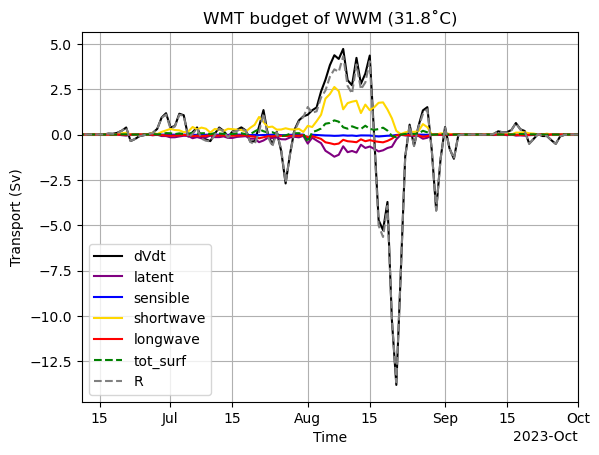

In [13]:
(dVdt_reassign_time/1e6).plot(label='dVdt', color='k')
(era5_resampled.omega_slhf/1e6).plot(label='latent', color='purple')
(era5_resampled.omega_sshf/1e6).plot(label='sensible', color='blue')
(era5_resampled.omega_ssr/1e6).plot(label='shortwave', color='gold')
(era5_resampled.omega_str/1e6).plot(label='longwave', color='r')
(era5_resampled/1e6).to_array().sum('variable').plot(label='tot_surf', color='green', linestyle='dashed')
((dVdt_reassign_time - summed)/1e6).plot(label='R', color='grey', linestyle='dashed')

plt.grid()
plt.legend()
plt.xlim(summed.time[160], summed.time[272])
plt.title('WMT budget of WWM (31.8˚C)')
plt.ylabel('Transport (Sv)')
plt.xlabel('Time');
#plt.savefig('WMT-budget-wwm-all-terms.pdf')

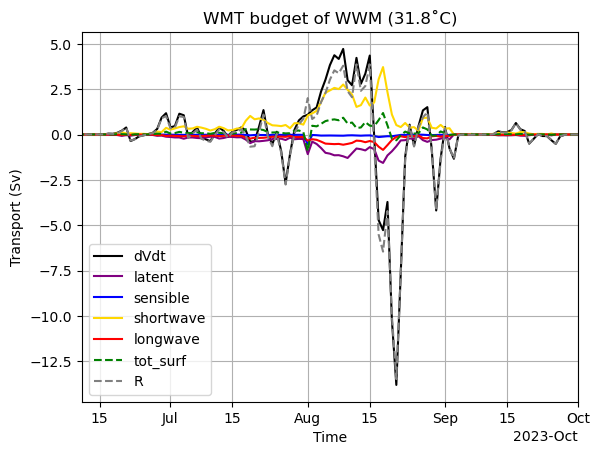

In [14]:
(dVdt_reassign_time/1e6).plot(label='dVdt', color='k')
(era5_resampled_regrid.omega_slhf/1e6).plot(label='latent', color='purple')
(era5_resampled_regrid.omega_sshf/1e6).plot(label='sensible', color='blue')
(era5_resampled_regrid.omega_ssr/1e6).plot(label='shortwave', color='gold')
(era5_resampled_regrid.omega_str/1e6).plot(label='longwave', color='r')
(era5_resampled_regrid/1e6).to_array().sum('variable').plot(label='tot_surf', color='green', linestyle='dashed')
((dVdt_reassign_time - summed_regrid)/1e6).plot(label='R', color='grey', linestyle='dashed')

plt.grid()
plt.legend()
plt.xlim(summed_regrid.time[160], summed_regrid.time[272])
plt.title('WMT budget of WWM (31.8˚C)')
plt.ylabel('Transport (Sv)')
plt.xlabel('Time');
#plt.savefig('WMT-budget-wwm-all-terms.pdf')

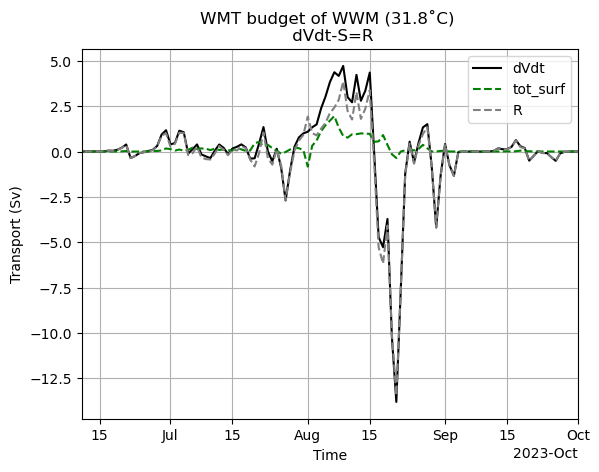

In [21]:
(dVdt_reassign_time/1e6).plot(label='dVdt', color='k')
(summed_nodT/1e6).plot(label='tot_surf', color='green', linestyle='dashed')
((dVdt_reassign_time - summed_nodT)/1e6).plot(label='R', color='grey', linestyle='dashed')

plt.grid()
plt.legend()
plt.xlim(summed_nodT.time[160], summed_nodT.time[272])
plt.title('WMT budget of WWM (31.8˚C) \n dVdt-S=R')
plt.ylabel('Transport (Sv)')
plt.xlabel('Time');
#plt.savefig('WMT-budget-wwm.pdf')

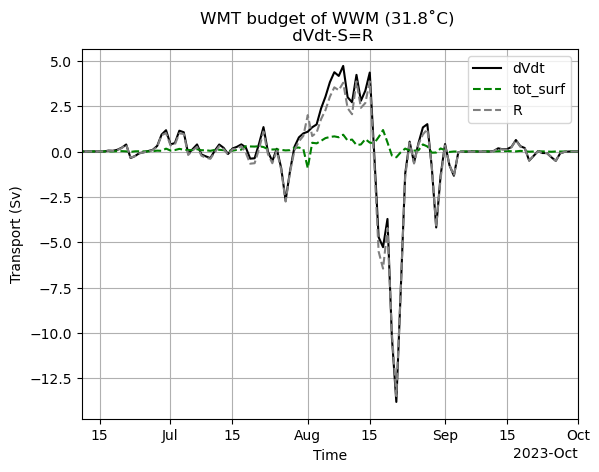

In [25]:
(dVdt_reassign_time/1e6).plot(label='dVdt', color='k')
(summed_regrid/1e6).plot(label='tot_surf', color='green', linestyle='dashed')
((dVdt_reassign_time - summed_regrid)/1e6).plot(label='R', color='grey', linestyle='dashed')

plt.grid()
plt.legend()
plt.xlim(summed_regrid.time[160], summed_regrid.time[272])
plt.title('WMT budget of WWM (31.8˚C) \n dVdt-S=R')
plt.ylabel('Transport (Sv)')
plt.xlabel('Time');
#plt.savefig('WMT-budget-wwm.pdf')

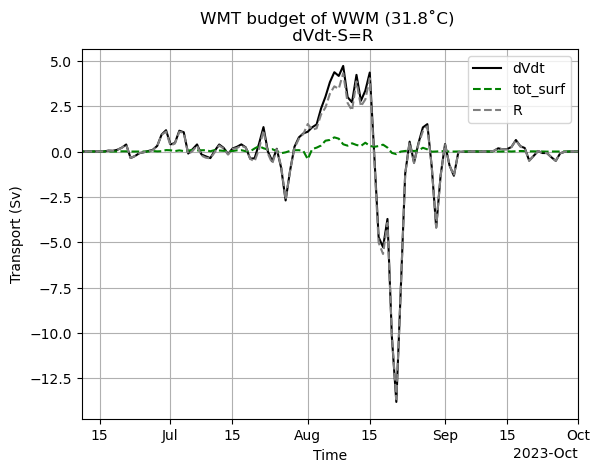

In [26]:
(dVdt_reassign_time/1e6).plot(label='dVdt', color='k')
(summed/1e6).plot(label='tot_surf', color='green', linestyle='dashed')
((dVdt_reassign_time - summed)/1e6).plot(label='R', color='grey', linestyle='dashed')

plt.grid()
plt.legend()
plt.xlim(summed_regrid.time[160], summed_regrid.time[272])
plt.title('WMT budget of WWM (31.8˚C) \n dVdt-S=R')
plt.ylabel('Transport (Sv)')
plt.xlabel('Time');
#plt.savefig('WMT-budget-wwm.pdf')

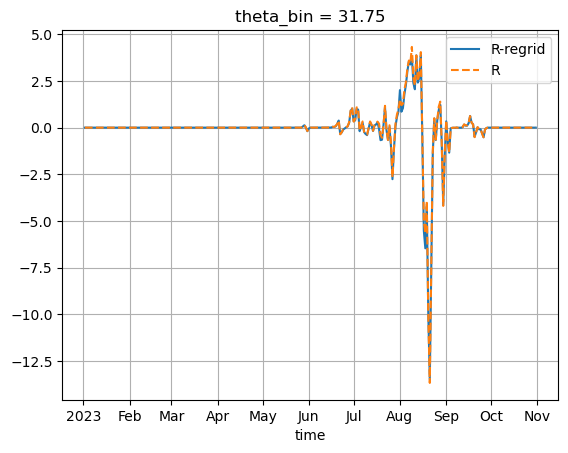

In [28]:
((dVdt_reassign_time - summed_regrid)/1e6).plot(label='R-regrid')
((dVdt_reassign_time - summed)/1e6).plot(label='R', linestyle='dashed')
plt.legend()
plt.grid();

In [32]:
(dVdt_reassign_time - summed_regrid).sum('time').values/1e6

-15.745480008562238

In [33]:
(dVdt_reassign_time - summed).sum('time').values/1e6

-9.15032921746661

## USE ORIGINAL SURFACE FLUXES DS (not the regridded GLORYS sst)

(19478.0, 19661.0)

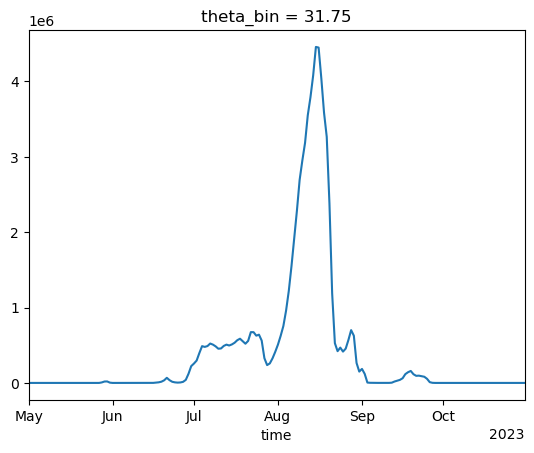

In [50]:
(tot_V_reassign_time/1e6).plot()
plt.xlim(summed.time[119], summed.time[-1])

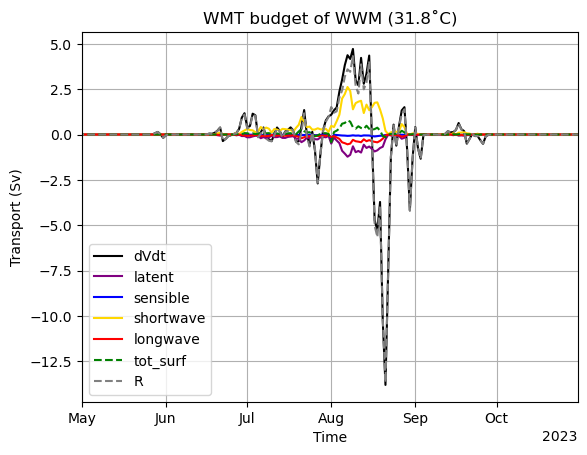

In [51]:
(dVdt_reassign_time/1e6).plot(label='dVdt', color='k')
(era5_resampled.omega_slhf/1e6).plot(label='latent', color='purple')
(era5_resampled.omega_sshf/1e6).plot(label='sensible', color='blue')
(era5_resampled.omega_ssr/1e6).plot(label='shortwave', color='gold')
(era5_resampled.omega_str/1e6).plot(label='longwave', color='r')
(era5_resampled/1e6).to_array().sum('variable').plot(label='tot_surf', color='green', linestyle='dashed')
((dVdt_reassign_time - summed)/1e6).plot(label='R', color='grey', linestyle='dashed')

plt.grid()
plt.legend()
plt.xlim(summed.time[119], summed.time[-1])
plt.title('WMT budget of WWM (31.8˚C)')
plt.ylabel('Transport (Sv)')
plt.xlabel('Time');
#plt.savefig('WMT-budget-wwm-all-terms.pdf')

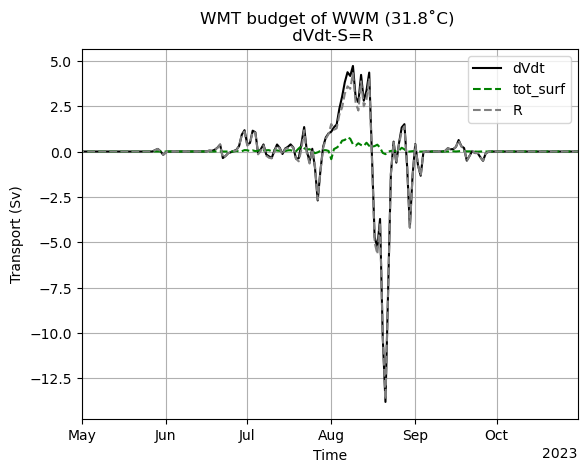

In [53]:
(dVdt_reassign_time/1e6).plot(label='dVdt', color='k')
(summed/1e6).plot(label='tot_surf', color='green', linestyle='dashed')
((dVdt_reassign_time - summed)/1e6).plot(label='R', color='grey', linestyle='dashed')

plt.grid()
plt.legend()
plt.xlim(summed.time[119], summed.time[-1])
plt.title('WMT budget of WWM (31.8˚C) \n dVdt-S=R')
plt.ylabel('Transport (Sv)')
plt.xlabel('Time');
#plt.savefig('WMT-budget-wwm.pdf')

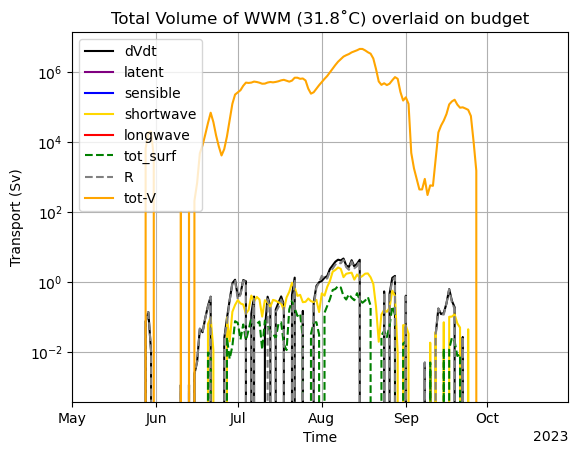

In [54]:
(dVdt_reassign_time/1e6).plot(label='dVdt', color='k')

(era5_resampled.omega_slhf/1e6).plot(label='latent', color='purple')
(era5_resampled.omega_sshf/1e6).plot(label='sensible', color='blue')
(era5_resampled.omega_ssr/1e6).plot(label='shortwave', color='gold')
(era5_resampled.omega_str/1e6).plot(label='longwave', color='r')
(era5_resampled/1e6).to_array().sum('variable').plot(label='tot_surf', color='green', linestyle='dashed')

((dVdt_reassign_time - summed)/1e6).plot(label='R', color='grey', linestyle='dashed')
(tot_V_reassign_time/1e6).plot(label='tot-V', color='orange')

plt.yscale('log')
plt.grid()
plt.legend()
plt.xlim(summed.time[119], summed.time[-1])
plt.title('Total Volume of WWM (31.8˚C) overlaid on budget')
plt.ylabel('Transport (Sv)')
plt.xlabel('Time');
#plt.savefig('WMT-budget-wwm-all-terms.pdf')